In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [7]:
df = pd.read_csv('concrete_data.csv')

In [9]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
df.shape

(1030, 9)

In [11]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [13]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [14]:
X = df.iloc[:,[0,1,2,3,4,5,6,7]]
y =  df['Strength']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =15)

In [20]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.5570208623821267

In [22]:
lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring = 'r2'))

np.float64(0.46099404916628683)

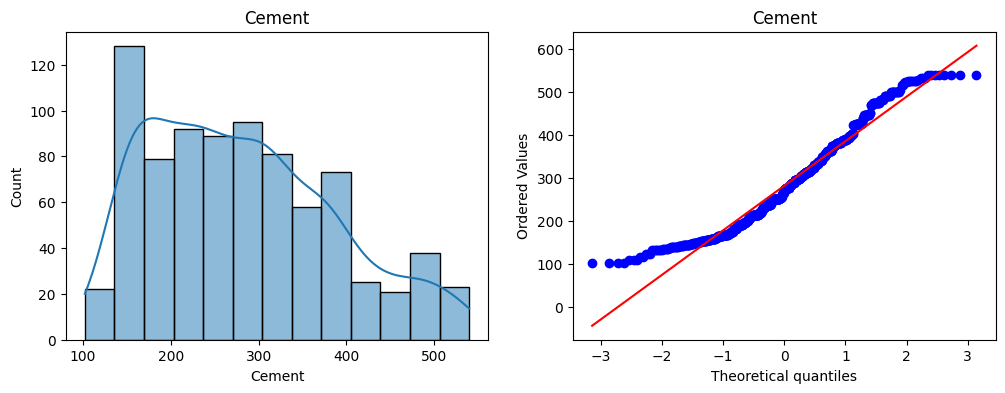

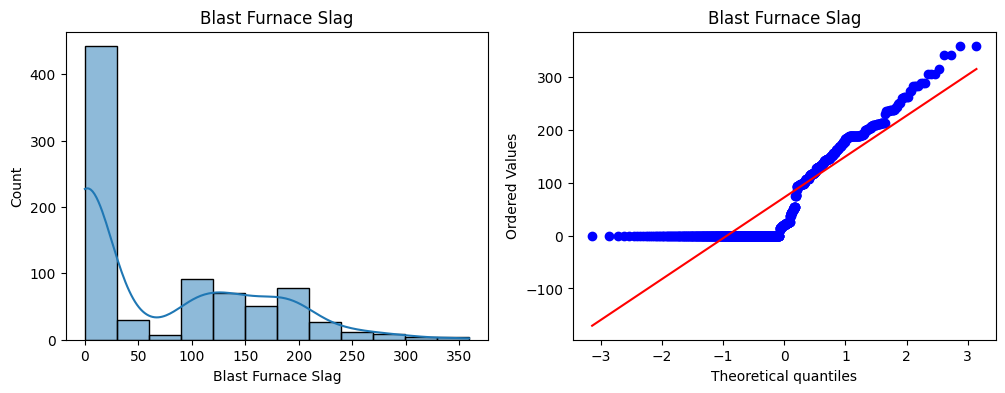

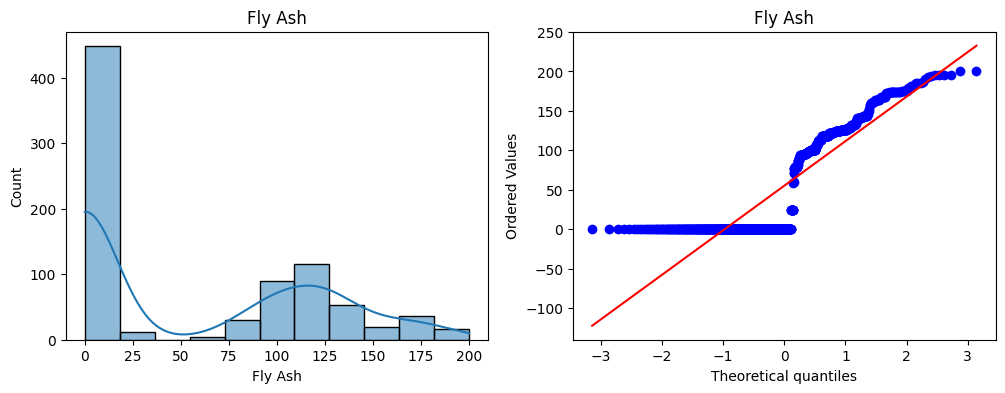

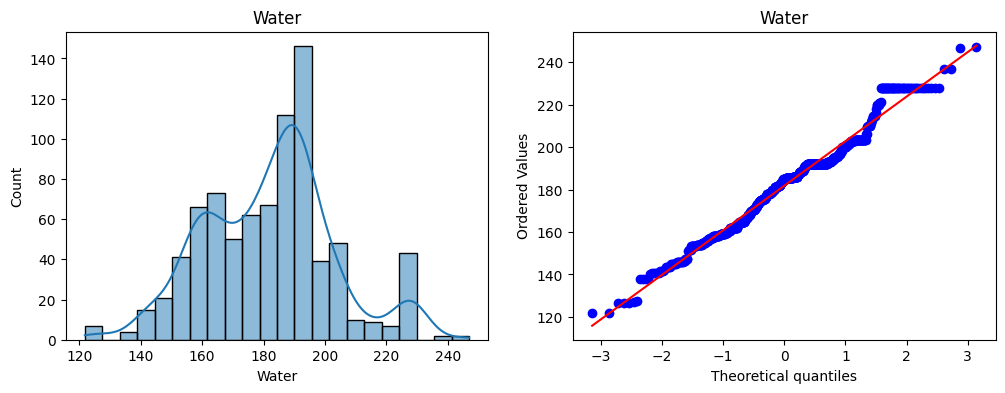

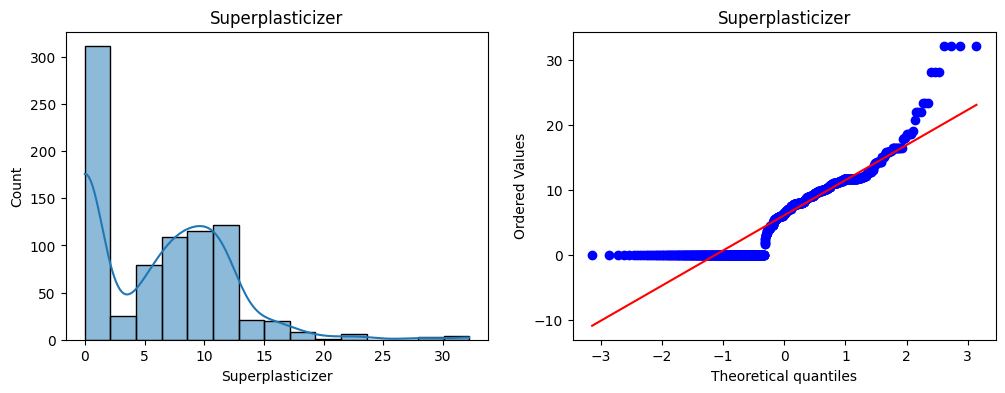

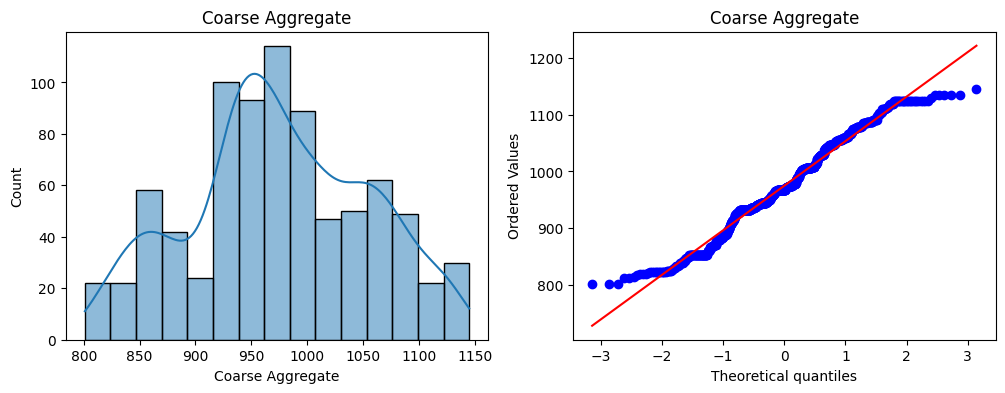

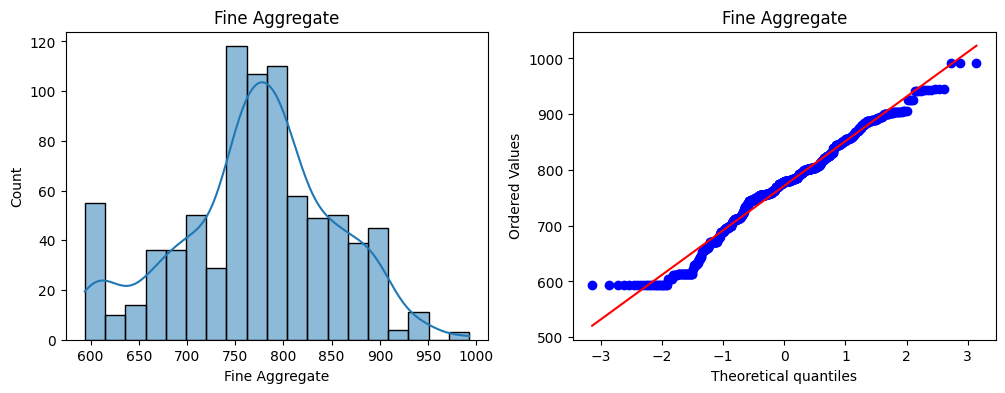

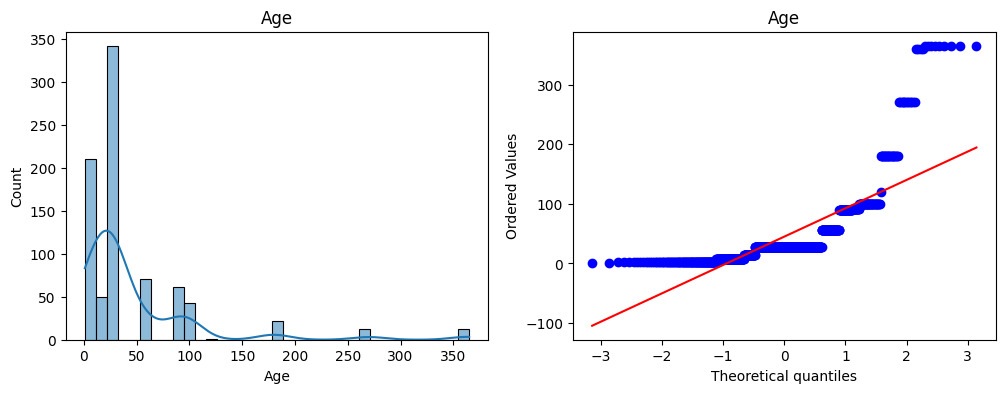

In [26]:
for col in X_train.columns:
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    sns.histplot(X_train[col] , kde =True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col] ,dist = 'norm', plot =plt)
    plt.title(col)
    plt.show()

In [27]:
#Apply Box cox transformation
pt = PowerTransformer(method = 'box-cox')
X_train_transformed = pt.fit_transform(X_train+0.00000001)
X_test_transformed = pt.transform(X_test+0.00000001)

In [28]:
pd.DataFrame({'cols' :X_train.columns, 'box_cox_lambdas': pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.149658
1,Blast Furnace Slag,0.015237
2,Fly Ash,-0.022850
3,Water,0.591027
4,Superplasticizer,0.075746
5,Coarse Aggregate,1.039703
6,Fine Aggregate,1.783907
7,Age,0.054536


In [29]:
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred = lr.predict(X_test_transformed)
r2_score(y_test, y_pred)

0.7777085784401601

In [30]:
# Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

np.float64(0.665853794702427)

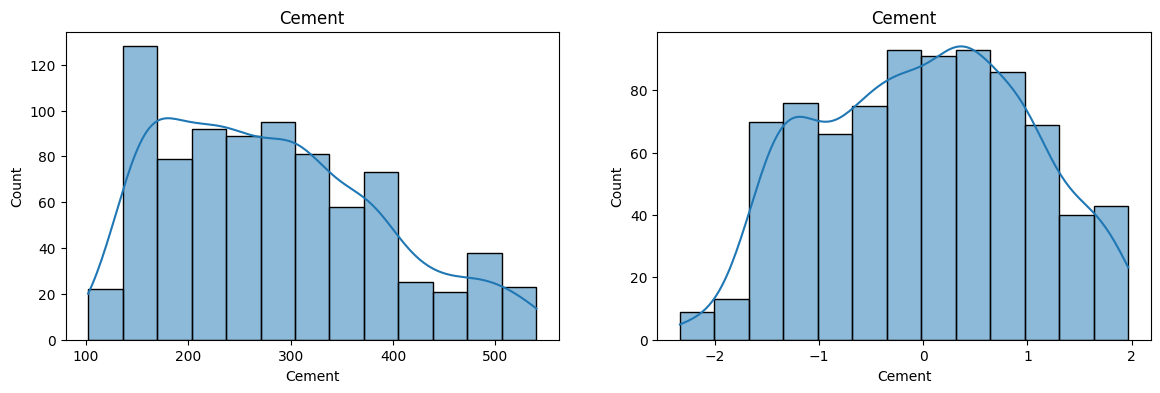

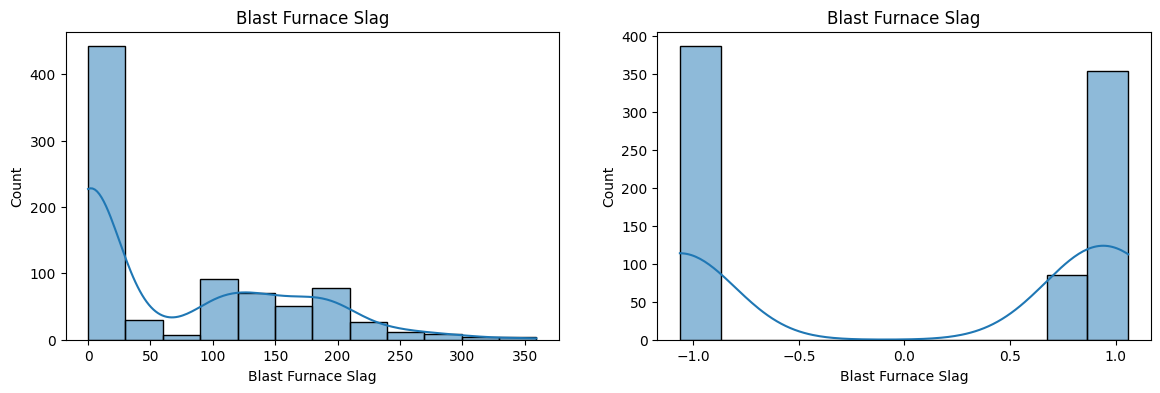

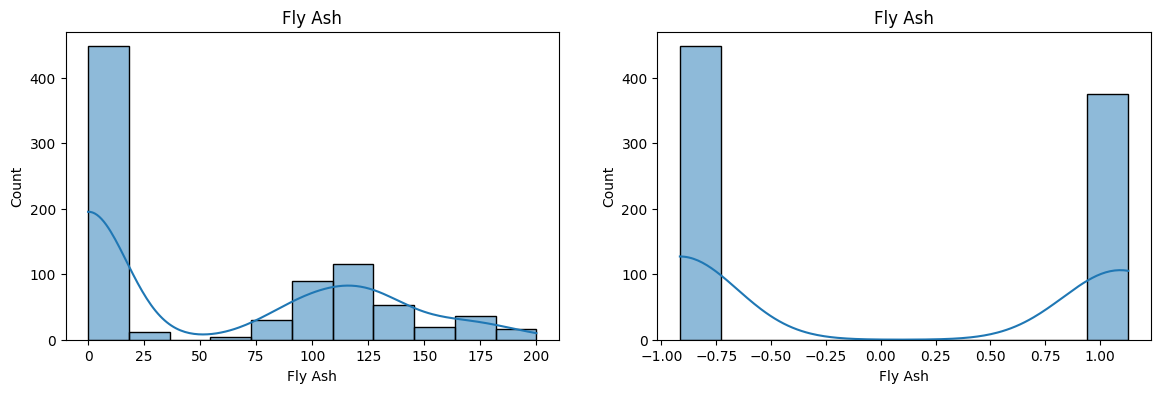

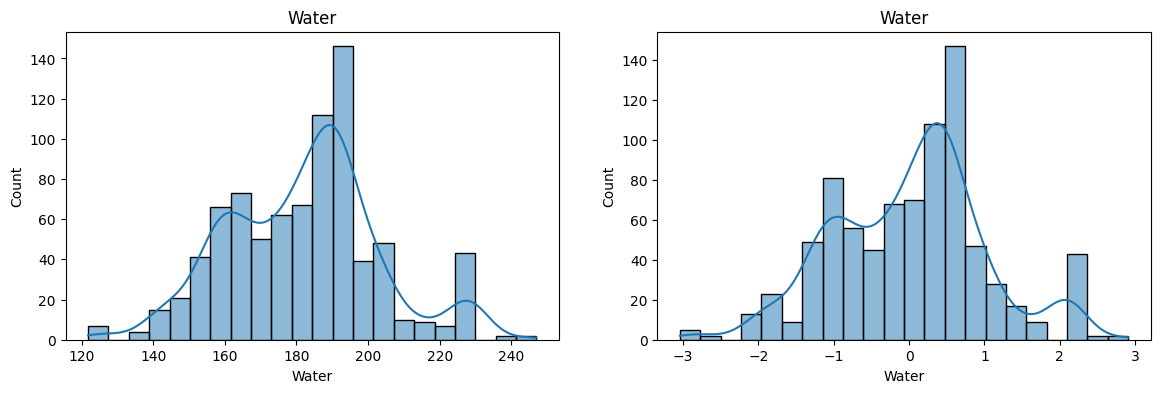

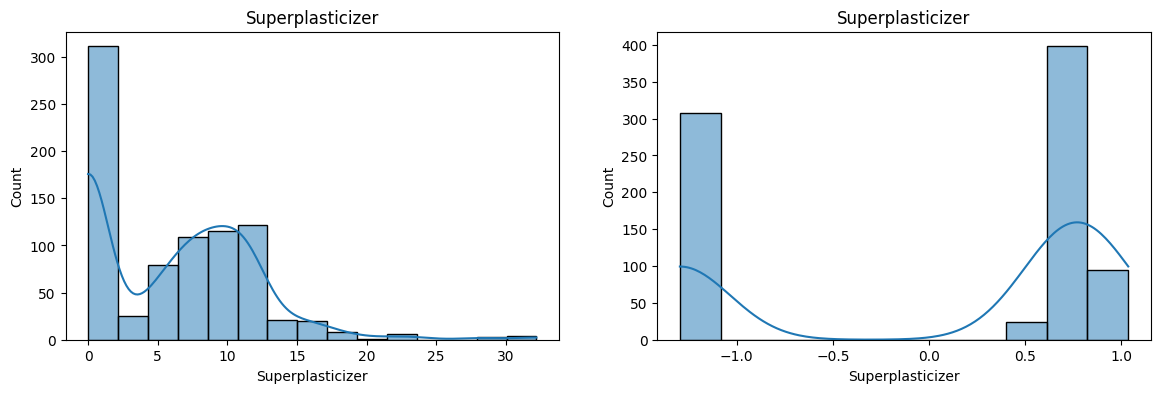

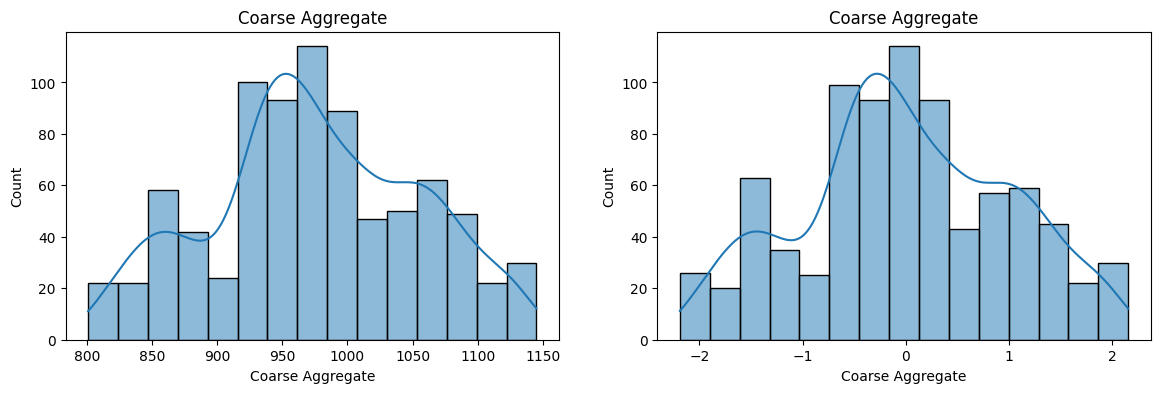

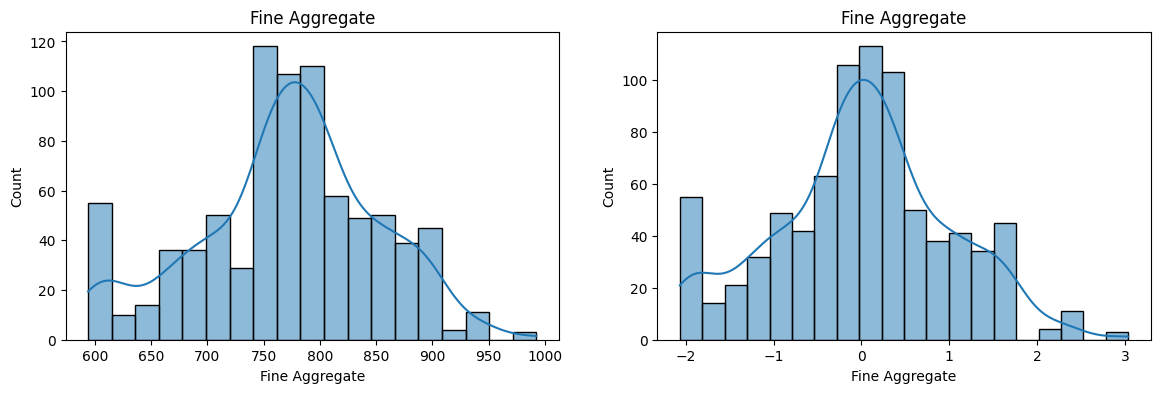

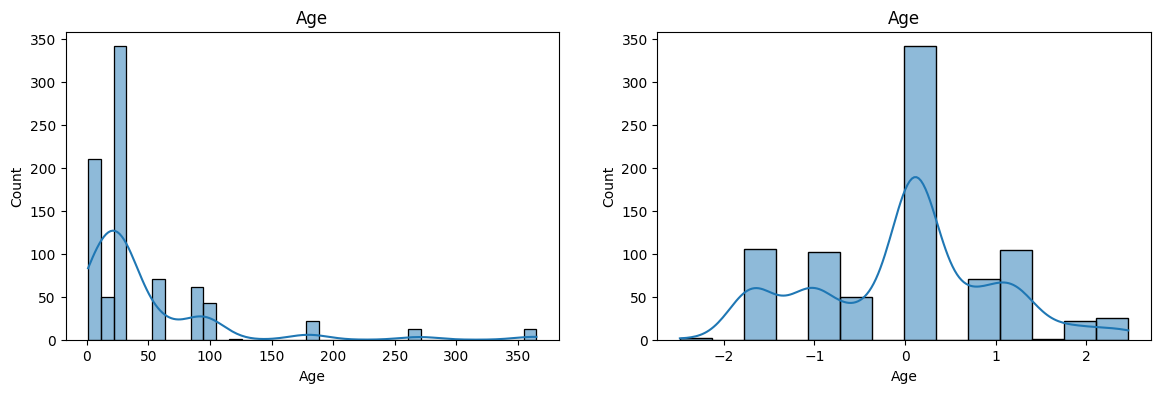

In [33]:
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col] , kde =True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed[col], kde =True)
    plt.title(col)

    plt.show()

In [34]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.7808447386666875


,cols,Yeo_Johnson_lambdas
0,Cement,0.146819
1,Blast Furnace Slag,-0.004190
2,Fly Ash,-0.122212
3,Water,0.588683
4,Superplasticizer,0.272046
5,Coarse Aggregate,1.039849
6,Fine Aggregate,1.784996
7,Age,0.006965


In [35]:
# applying cross val score

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

np.float64(0.6834625134285742)

In [36]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)


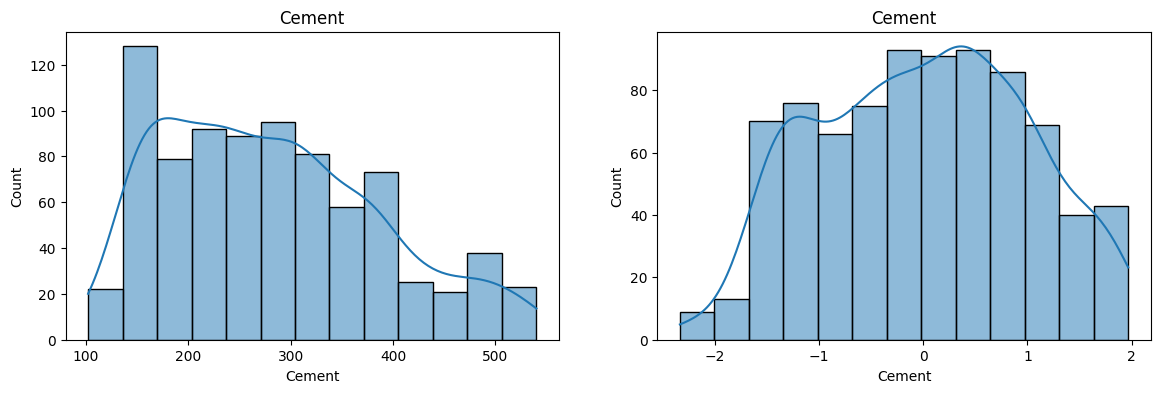

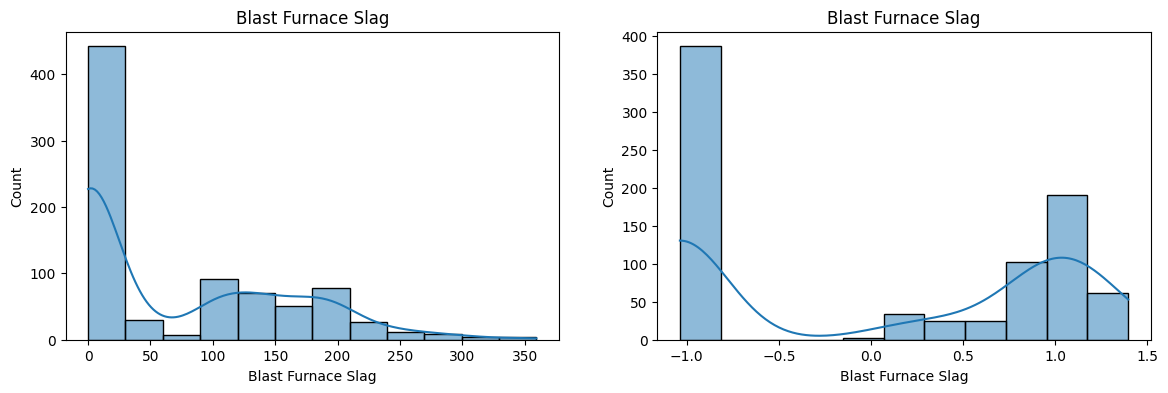

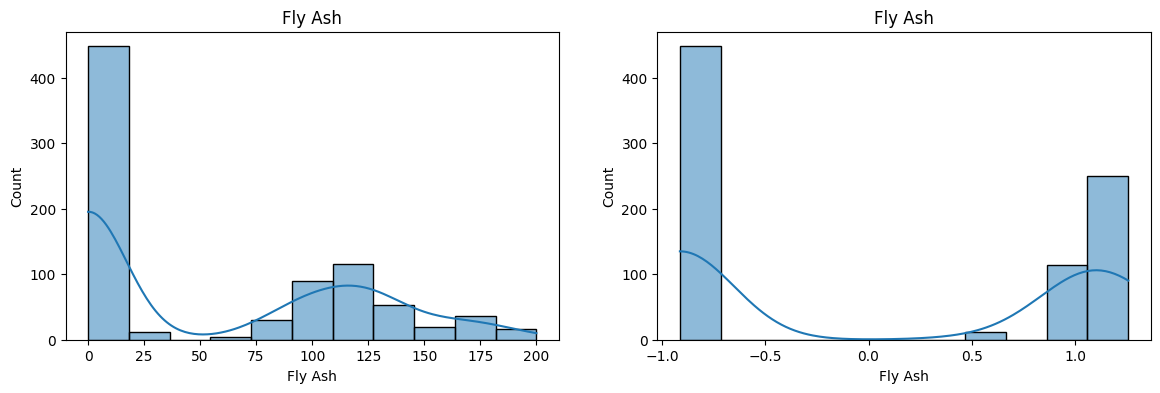

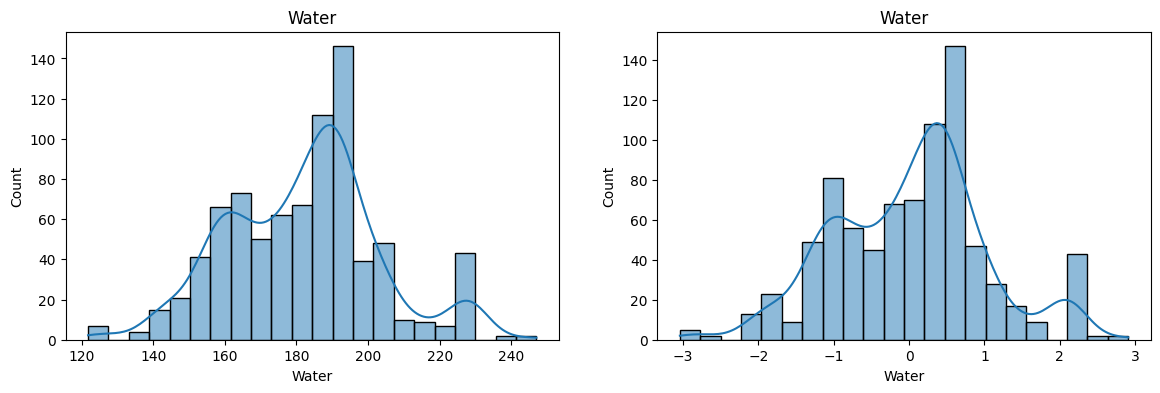

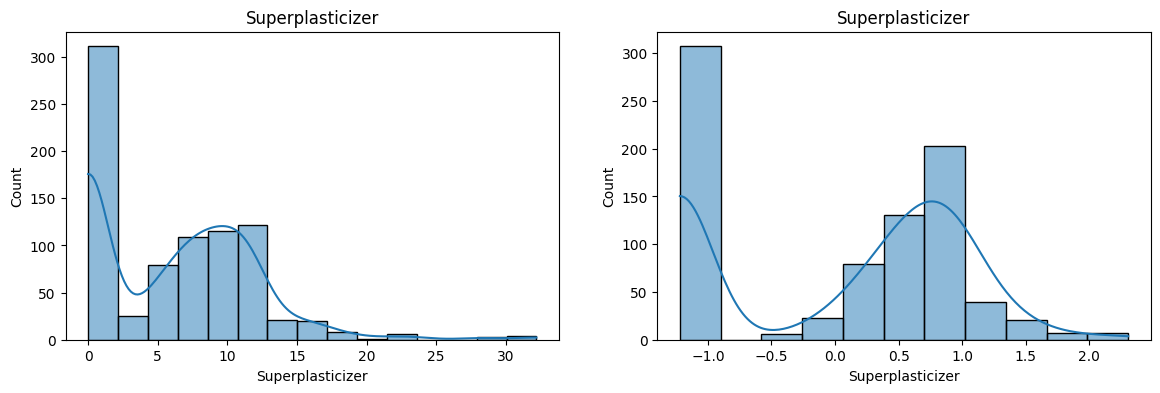

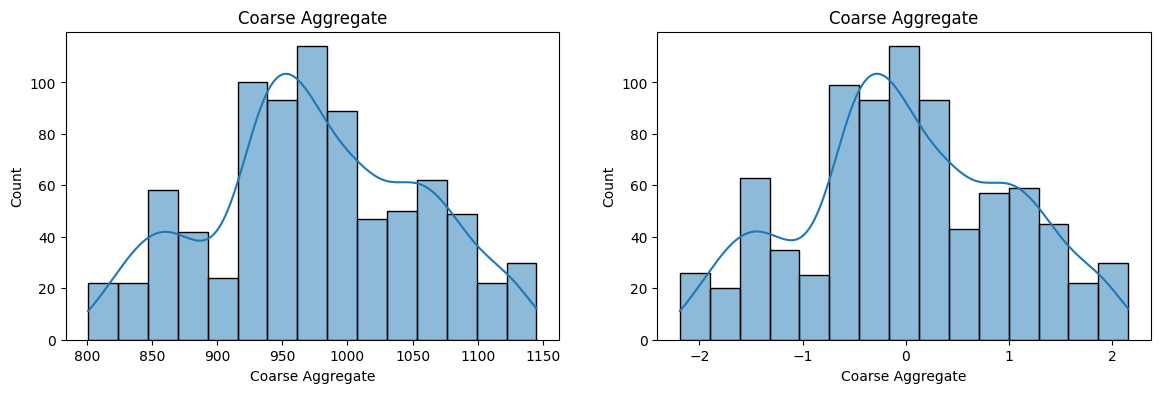

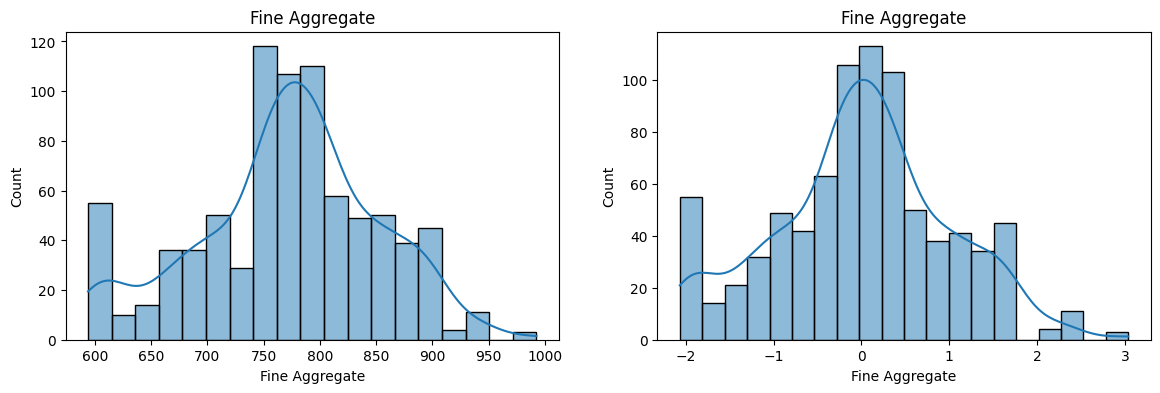

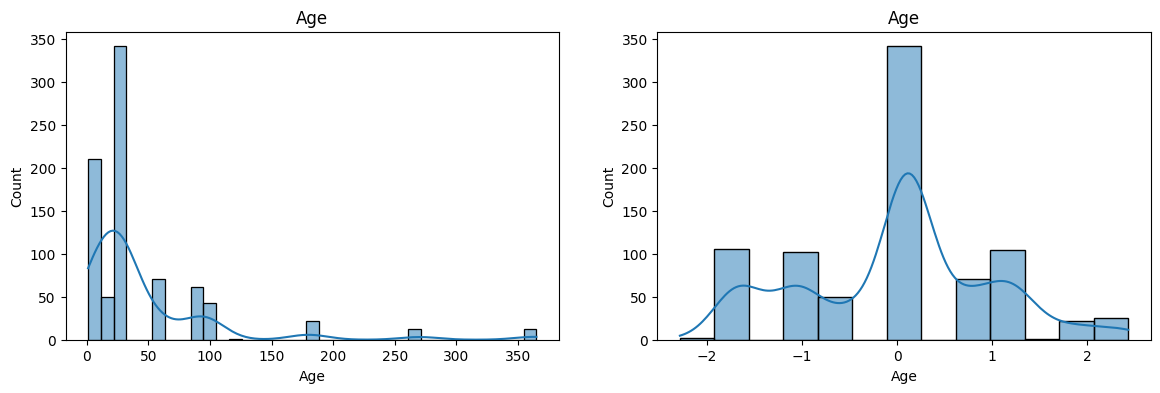

In [38]:

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col] ,kde = True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed2[col] , kde =True)
    plt.title(col)

    plt.show()

In [39]:
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})


,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.146819
1,Blast Furnace Slag,0.016633,-0.004190
2,Fly Ash,-0.136480,-0.122212
3,Water,0.808438,0.588683
4,Superplasticizer,0.264160,0.272046
5,Coarse Aggregate,1.129395,1.039849
6,Fine Aggregate,1.830763,1.784996
7,Age,0.001771,0.006965
